In [5]:
# imports
import torch
from utils import ROOT_DIR
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx
import os
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import networkx as nx

In [6]:
# load the raw data
graph_tensors = torch.load(os.path.join(ROOT_DIR, 'preprocessing', 'graph_tensors.pt'))

# make the graph
graph = Data(**graph_tensors)

# convert to networkx
G = to_networkx(graph)

In [7]:
# investigate the graph
print("Attributes:", "\n", graph.keys, "\n",
      f"Num. nodes {graph.num_nodes}, Num. edges {graph.num_edges}, " 
      f"Num. node features {graph.num_node_features}", end="\n")
print(f"\tHas isolated nodes: {graph.has_isolated_nodes()}")
print(f"\tHas self-loops: {graph.has_self_loops()}")
print(f"\tIs undirected: {graph.is_undirected()}")
print(f"\tIs directed: {graph.is_directed()}") 

Attributes: 
 ['pos', 'y', 'node_type', 'id_neuron', 'edge_attr', 'edge_index', 'x'] 
 Num. nodes 302, Num. edges 4396, Num. node features 1024
	Has isolated nodes: False
	Has self-loops: True
	Is undirected: False
	Is directed: True


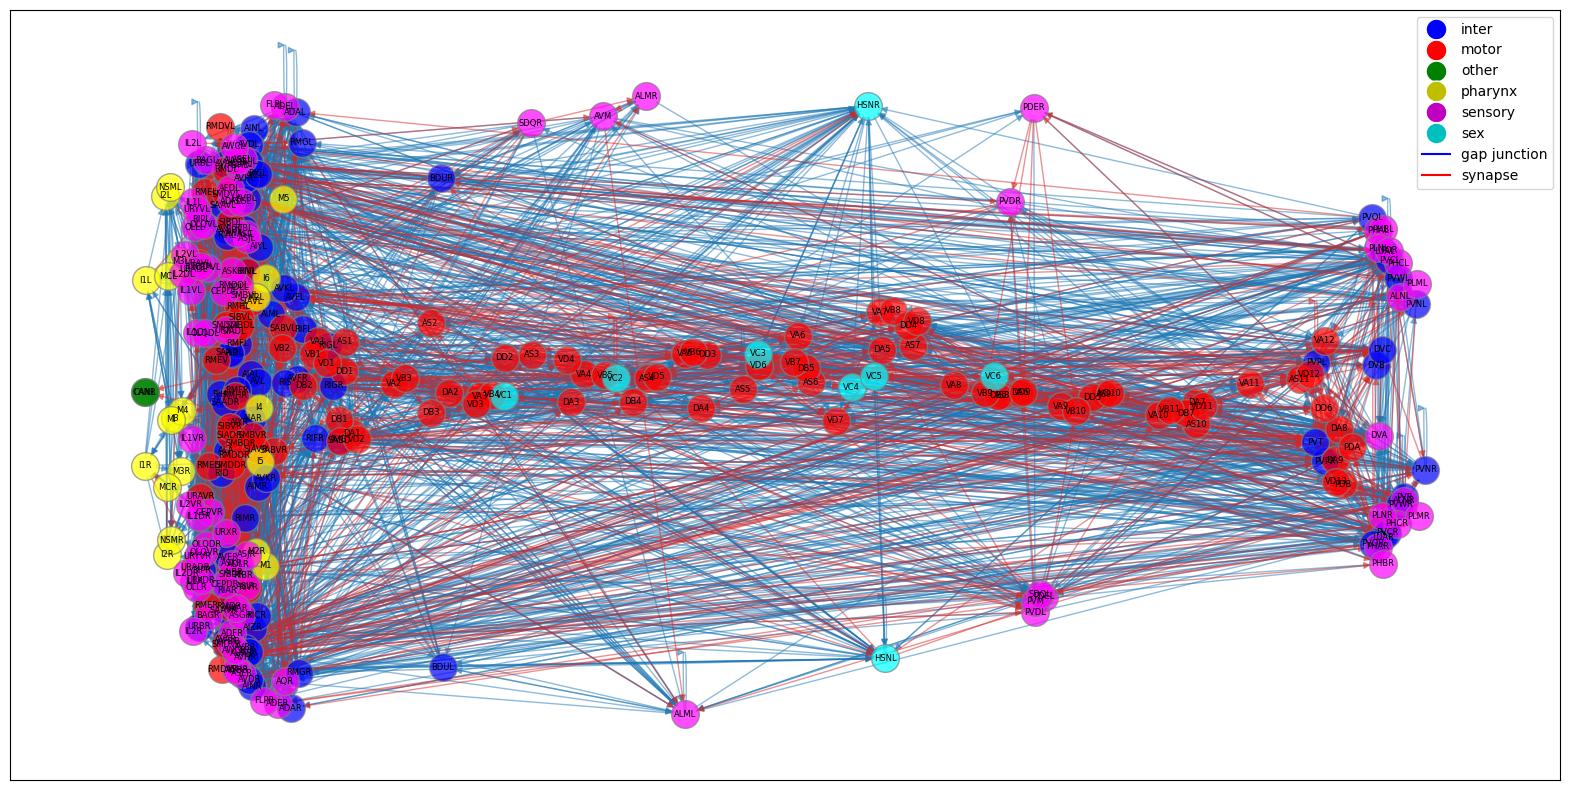

In [8]:
# draw the graph
plt.figure(figsize=(20,10)) 

## nodes
inter = [node for i,node in enumerate(G.nodes) if graph.y[i]==0.]
motor = [node for i,node in enumerate(G.nodes) if graph.y[i]==1.]
other = [node for i,node in enumerate(G.nodes) if graph.y[i]==2.]
pharynx = [node for i,node in enumerate(G.nodes) if graph.y[i]==3.]
sensory = [node for i,node in enumerate(G.nodes) if graph.y[i]==4.]
sexspec = [node for i,node in enumerate(G.nodes) if graph.y[i]==5.]

## edges
junctions = [edge for i,edge in enumerate(G.edges) if graph.edge_attr[i,0]==0.]
synapses = [edge for i,edge in enumerate(G.edges) if graph.edge_attr[i,1]==0.]

## metadata
pos = graph.pos
labels = graph.id_neuron
options = {"edgecolors": "tab:gray", "node_size": 400, "alpha": 0.7}

## draw nodes
nx.draw_networkx_edges(G, pos, edgelist=junctions, alpha=0.5, edge_color="tab:blue");
nx.draw_networkx_edges(G, pos, edgelist=synapses, alpha=0.5, edge_color="tab:red");
nx.draw_networkx_labels(G, pos, labels, font_size=6);

## draw edges
nx.draw_networkx_nodes(G, pos, nodelist=inter, node_color="blue", **options);
nx.draw_networkx_nodes(G, pos, nodelist=motor, node_color="red", **options);
nx.draw_networkx_nodes(G, pos, nodelist=other, node_color="green", **options);
nx.draw_networkx_nodes(G, pos, nodelist=pharynx, node_color="yellow", **options);
nx.draw_networkx_nodes(G, pos, nodelist=sensory, node_color="magenta", **options);
nx.draw_networkx_nodes(G, pos, nodelist=sexspec, node_color="cyan", **options);

## draw legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='inter', markerfacecolor='b', markersize=15),
    Line2D([0], [0], marker='o', color='w', label='motor', markerfacecolor='r', markersize=15),
    Line2D([0], [0], marker='o', color='w', label='other', markerfacecolor='g', markersize=15),
    Line2D([0], [0], marker='o', color='w', label='pharynx', markerfacecolor='y', markersize=15),
    Line2D([0], [0], marker='o', color='w', label='sensory', markerfacecolor='m', markersize=15),
    Line2D([0], [0], marker='o', color='w', label='sex', markerfacecolor='c', markersize=15),
    Line2D([0], [0], color='b', label='gap junction', markersize=10),
    Line2D([0], [0], color='r', label='synapse', markersize=10),        
]
plt.legend(handles=legend_elements, loc='upper right')
plt.show()